## pCMV-ACBEmax
QUEEN script for pCMV-ACBEmax construction.
1. A fragment encoding rAPOBEC1 was amplified from pCMV-BE4max using the primer pair SI1352/SI1357.
2. A fragment encoding 2xUGI was amplified from pCMV-BE4max using the primer pair SI1359/SI1350.
3. A backbone fragment was amplified from pCMV-BE4max using the primer pair SI1351/SI448.
4. An ABEmax fragment was amplified from pCMV-Target-ACEmax using the primer pair SI447/SI1105.
5. The four fragments were assembled by Gibson Assembly.

In [1]:
%matplotlib inline

In [2]:
import sys 
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
QUEEN(record="output/pCMV-Target-ACEmax.gbk", product="pCMV_Target_ACEmax") #Load pCMV-Target-ACEmax plasmid object.
QUEEN(record="https://benchling.com/s/seq-TWeI3GfYr2zJr5z87Rjq", dbtype="benchling", product="pCMV_BE4max") #Load pCMV-BE4max plasmid object.

<queen.QUEEN object; project='pCMV_BE4max', length='8961 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "1. A fragment encoding rAPOBEC1 was amplified from pCMV-BE4max using the primer pair SI1352/SI1357."
QUEEN(seq="GATGACGATGACAAGTCTGGCTCCTCAGAGACTGGGCCTGTCGCC", product="SI1352") #Create a QUEEN object for the forward primer. 
QUEEN(seq="CTTCAGGCCTGTGGCCCACAGGAT", product="SI1357")                      #Create a QUEEN object for the reverse primer. 
pCMV_BE4max.searchsequence(SI1352.seq[-18:], product="FW10", pn=processname1, pd=description1)          #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_BE4max.searchsequence(SI1357.seq[-18:], product="RV10", pn=processname1, pd=description1)          #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_BE4max, FW10[0].end, RV10[0].start, product="extract10", pn=processname1, pd=description1) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract10, SI1352.seq, SI1357.rcseq, product="fragment10", pn=processname1, pd=description1) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment10', length='705 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "2. A fragment encoding 2xUGI was amplified from pCMV-BE4max using the primer pair SI1359/SI1350."
QUEEN(seq="ATCCTGTGGGCCACAGGCCTGAAGACTAATCTGAGCGACATCATT", product="SI1359") #Create a QUEEN object for the forward primer. 
QUEEN(seq="GATCAGCGGGTTTAAACTCATTATTAGACTTTCCTCTTCTTCTTG", product="SI1350") #Create a QUEEN object for the reverse primer. 
pCMV_BE4max.searchsequence(SI1359.seq[-18:], product="FW11", pn=processname2, pd=description2)          #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_BE4max.searchsequence(SI1350.seq[-18:], product="RV11", pn=processname2, pd=description2)          #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_BE4max, FW11[0].end, RV11[0].start, product="extract11", pn=processname2, pd=description2) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract11, SI1359.seq, SI1350.rcseq, product="fragment11", pn=processname2, pd=description2) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment11', length='641 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "3. A backbone fragment was amplified from pCMV-BE4max using the primer pair SI1351/SI448."
QUEEN(seq="TAATAATGAGTTTAAACCCGCTGATC", product="SI1351") #Create a QUEEN object for the forward primer. 
QUEEN(seq="CACTTTTAAAGTTCTGCTATGTGGC", product="SI448") #Create a QUEEN object for the reverse primer. 
pCMV_BE4max.searchsequence(SI1351.seq[-18:], product="FW12", pn=processname3, pd=description3)                #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_BE4max.searchsequence(SI448.seq[-18:],  product="RV12", pn=processname3, pd=description3)                #Search for the 18-bp 3’-end sequences of the reverse primer.
f12 = cropdna(pCMV_BE4max, FW12[0].end, RV12[0].start, product="extract12", pn=processname3, pd=description3) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract12, SI1351.seq, SI448.rcseq, product="fragment12", pn=processname3, pd=description3)        #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment12', length='2148 bp', topology='linear'>

In [7]:
processname4 = "PCR"
description4 = "4. An ABEmax fragment was amplified from pCMV-Target-AIDmax using the primer pair SI447/SI1105."
QUEEN(seq="GCCACATAGCAGAACTTTAAAAGTG", product="SI447") #Create a QUEEN object for the forward primer. 
QUEEN(seq="CTTGTCATCGTCATCCTTGTA", product="SI1105") #Create a QUEEN object for the reverse primer. 
pCMV_Target_ACEmax.searchsequence(SI447.seq[-18:],  product="FW14", pn=processname4, pd=description4)          #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_Target_ACEmax.searchsequence(SI1105.seq[-18:], product="RV14", pn=processname4, pd=description4)          #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pCMV_Target_ACEmax, FW14[0].end, RV14[0].start, product="extract14", pn=processname4, pd=description4) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract14, SI447.seq, SI1105.rcseq, product="fragment14", pn=processname4, pd=description4)         #Add forward and reverse primer sequences to the both ends of the cropped fragment.    

<queen.QUEEN object; project='fragment14', length='6878 bp', topology='linear'>

In [8]:
processname5 = "Gibson Assembly"
description5 = "5. The four fragments were assembled by Gibson Assembly."
modifyends(fragment10, "*{15}/-{15}","-{24}/*{24}", product="fragment10_mod", pn=processname5, pd=description5) #Generate long sticky ends on the both sides of "fragment10".
modifyends(fragment11, "*{24}/-{24}","-{26}/*{26}", product="fragment11_mod", pn=processname5, pd=description5) #Generate long sticky ends on the both sides of "fragment11".
modifyends(fragment12, "*{26}/-{26}","-{25}/*{25}", product="fragment12_mod", pn=processname5, pd=description5) #Generate long sticky ends on the both sides of "fragment12".
modifyends(fragment14, "*{25}/-{25}","-{15}/*{15}", product="fragment14_mod", pn=processname5, pd=description5) #Generate long sticky ends on the both sides of "fragment14".
joindna(fragment10_mod, fragment11_mod, fragment12_mod, fragment14_mod, topology="circular", product="pCMV_ACBEmax", pn=processname5, pd=description5) #Join the fragments.

<queen.QUEEN object; project='pCMV_ACBEmax', length='10282 bp', topology='circular'>

In [9]:
pCMV_ACBEmax.printfeature()

feature_id  feature_type  qualifier:label         start  end    strand  
1           CDS           AmpR                    0      153    -       
100         source        source                  0      776    +       
200         misc_feature  fragment-8              0      1241   +       
300         promoter      AmpR promoter           153    258    -       
400         primer_bind   pRS-marker              336    356    -       
500         enhancer      CMV enhancer            527    907    +       
600         source        source                  776    6505   +       
700         promoter      CMV promoter            907    1111   +       
800         primer_bind   CMV-F                   1061   1082   +       
900         misc_feature  fragment-13             1138   6530   +       
1000        promoter      T7 promoter             1152   1171   +       
1100        CDS           SV40 NLS                1220   1241   +       
1200        CDS           ecTadA(wt)              1

[['fragment-7'], ['fragment-8'], ['fragment-10'], ['fragment-11'], ['fragment-12'], ['fragment-13'], ['fragment-14']]


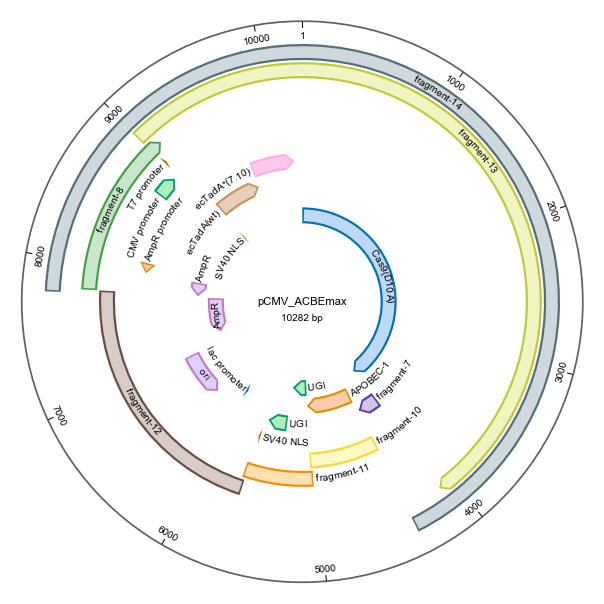

In [10]:
def add_fragment_annotation(dna, fragment, new_feature_id, color_set):
    """
    Define seqeunce featurtes for "fragment" in "dna". 
    """
    f = dna.searchsequence(fragment.seq) #Search for "fragment" seqeunce in "dna"
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute(new_feature_id), new_copy=False)                                                      #Define a new feature whose feature_id becomes "new_feature_id".
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:label", operation=createattribute(new_feature_id), new_copy=False)         #Provide a qualifier:label to the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False) #Set a edge color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False) #Set a face color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="strand", operation=replaceattribute(0), new_copy=False)                              #Set a coding direction of the new feature
    
def visualization(dna):
    """
    Set the start position of "dna" and visualize its circular sequence map. 
    """
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")           #Search for the feature that represent the Cas9 gene.
    plasmid   = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular")                     #Set the first nucleotide of the Cas9 gene as the start position of the plasmid.
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+") #Obtain the features whose feature_id are "fragment-[0-9]+".
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))                    #Sort the order of fragments according to qualifier.label.
    print([f.qualifiers["label"] for f in fragments])
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments #Select the sequence features to be visualized.
    fig        = visualizemap(plasmid, feature_list=features, map_view="circular", tick_interval=1000, title=dna.project) #Visualize the circular seqeunce map of the plasmid.
    return fig, plasmid

#Paris of color codes for gene edge and face 
color_sets = [('#E53935', '#ffcdd2'), ('#8E24AA', '#e1bee7'), ('#3949AB', '#c5cae9'), ('#1E88E5', '#bbdefb'), ('#00ACC1', '#b2ebf2'), ('#D81B60', '#f8bbd0'), ('#5E35B1', '#d1c4e9'), 
              ('#43A047', '#c8e6c9'), ('#7CB342', '#dcedc8'), ('#FDD835', '#fff9c4'), ('#FB8C00', '#ffe0b2'), ('#6D4C41', '#d7ccc8'), ('#C0CA33', '#f0f4c3'), ('#546E7A', '#cfd8dc')]

add_fragment_annotation(pCMV_ACBEmax, fragment10, "fragment-10", color_sets[9])
add_fragment_annotation(pCMV_ACBEmax, fragment11, "fragment-11", color_sets[10])
add_fragment_annotation(pCMV_ACBEmax, fragment12, "fragment-12", color_sets[11])
add_fragment_annotation(pCMV_ACBEmax, fragment14, "fragment-14", color_sets[13])
fig = visualization(pCMV_ACBEmax)

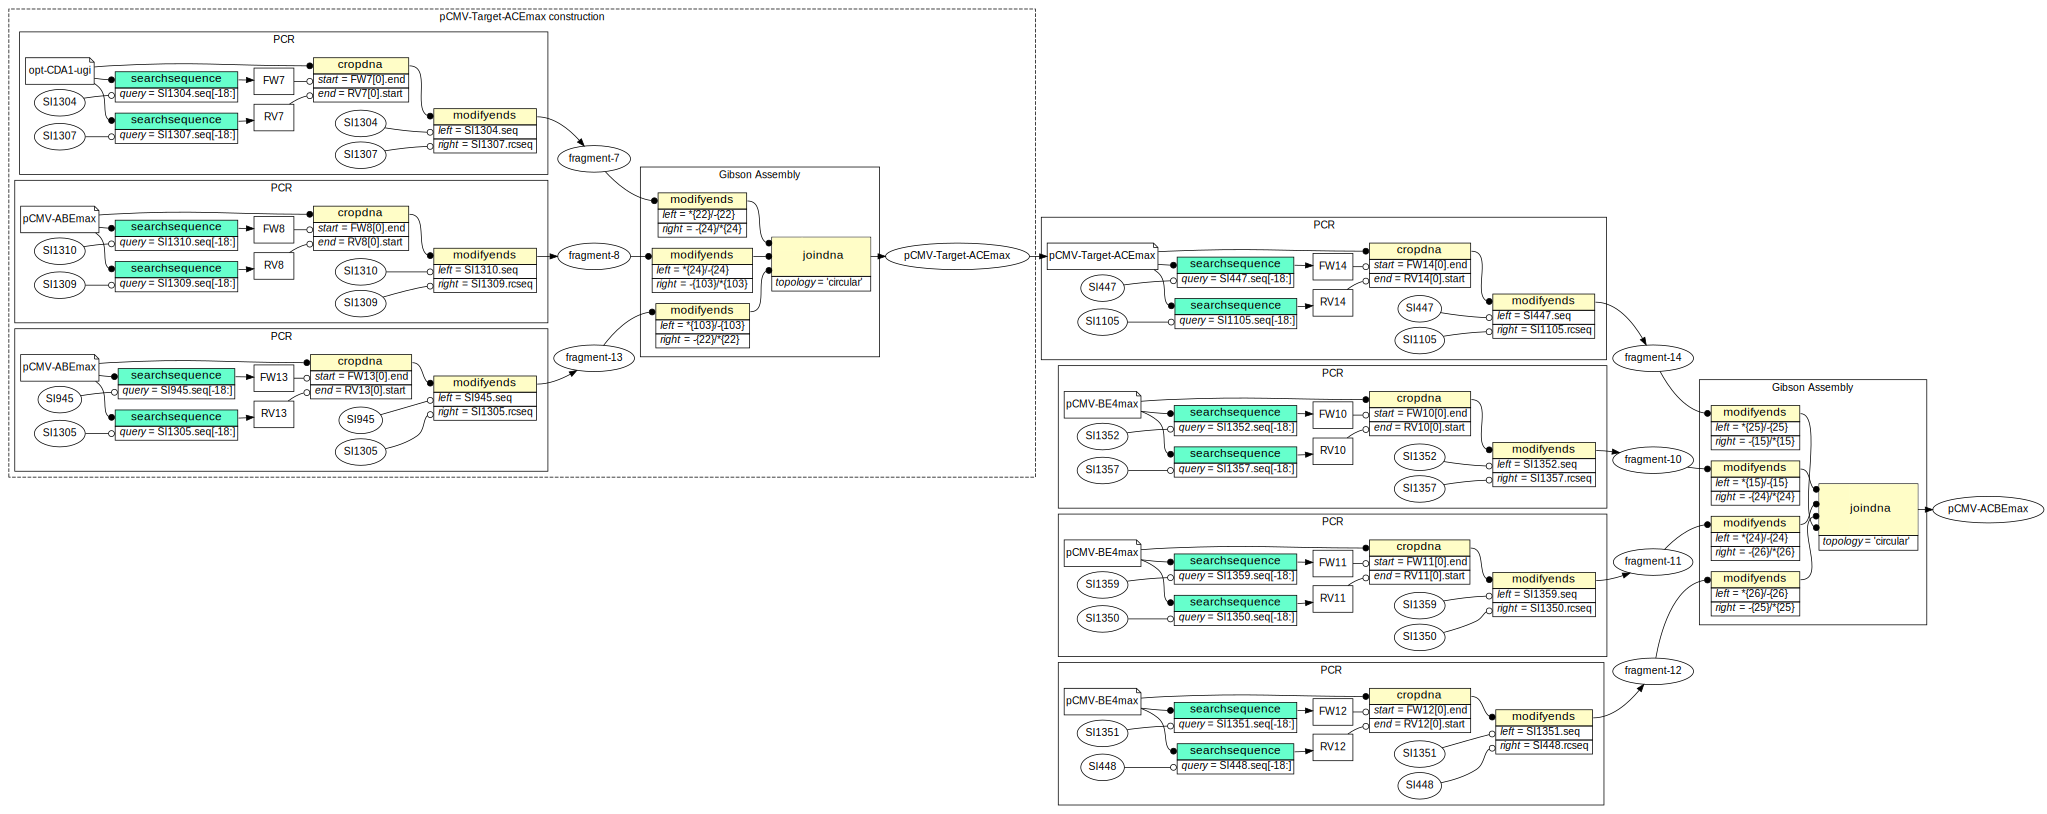

In [11]:
#Visualize the operational process chart of pCMV-ACBEamx.
flow = visualizeflow(pCMV_ACBEmax, alias_dict={"fragment6":"fragment-6", "fragment7":"fragment-7", "fragment8":"fragment-8", "fragment9":"fragment-9","fragment10":"fragment-10", "fragment11":"fragment-11", "fragment13":"fragment-13", "fragment12":"fragment-12", "fragment14":"fragment-14", "pCMV_BE4max":"pCMV-BE4max", "pCMV_ACBEmax":"pCMV-ACBEmax", "pCMV_Target_ACEmax":"pCMV-Target-ACEmax", "pCMV_ABEmax":"pCMV-ABEmax", "opt_CDA1_ugi":"opt-CDA1-ugi"})
flow.render("output/pCMV_ACBEmax_construction")
flow

In [12]:
pCMV_ACBEmax.outputgbk("output/pCMV-ACBEmax.gbk")

In [13]:
#Generate and execute the quine code and confirm if the cloned QUEEN_object is identical to the original one.
quine(pCMV_ACBEmax, execution=True)

True

In [14]:
#Extract the narrative descriptions linked to the operational processes.
quine(pCMV_ACBEmax, process_description=True)

pCMV_Target_ACEmax construction
    1. The C-terminus region of Target-AIDmax was amplified from pUC-optimized-PmCDA1-ugi using the primer pair SI1304/SI1307.
    2. A plasmid backbone was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309.
    3. An ABEmax fragment was amplified from pCMV-ABEmax using the primer pair SI945/SI1305.
    4. The three fragments were assembled by Gibson Assembly.
pCMV_ACBEmax construction
    1. A fragment encoding rAPOBEC1 was amplified from pCMV-BE4max using the primer pair SI1352/SI1357.
    2. A fragment encoding 2xUGI was amplified from pCMV-BE4max using the primer pair SI1359/SI1350.
    3. A backbone fragment was amplified from pCMV-BE4max using the primer pair SI1351/SI448.
    4. An ABEmax fragment was amplified from pCMV-Target-AIDmax using the primer pair SI447/SI1105.
    5. The four fragments were assembled by Gibson Assembly.
